In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import math
from scipy.optimize import minimize
from pulp import *
from numpy.linalg import inv
from numpy import linalg
from statistics import mean

In [3]:
data = pd.read_csv("F:\\szakdoga\\data.csv", delimiter = ",", names = ['x','y','z'])
data = data.drop(data.index[0])
#data = data[:25]
#print(data)

In [4]:
z_szoras = []
for i in range(3,len(data['z'])):
    z_szoras.append((data['z'][i]+data['z'][i-1]+data['z'][i-2])/3)
z_szoras.append(mean(data['z']))
z_szoras.append(mean(data['z'][:len(z_szoras)//2]))
z_szoras.append(mean(data['z'][len(z_szoras)//2:]))
#print(len(data['z']))
#print(z_szoras)

C:\Users\Lacifater\AppData\Local\Temp\ipykernel_6864\3505847362.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  z_szoras.append(mean(data['z'][:len(z_szoras)//2]))
C:\Users\Lacifater\AppData\Local\Temp\ipykernel_6864\3505847362.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  z_szoras.append(mean(data['z'][len(z_szoras)//2:]))


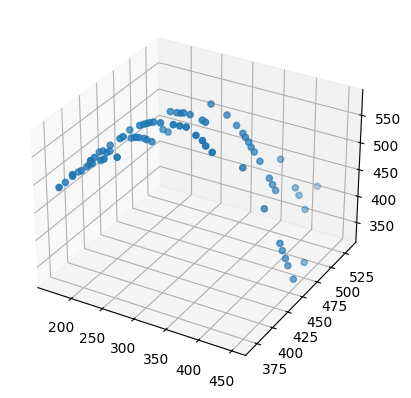

In [20]:
ax = plt.axes(projection='3d')
ax.scatter3D(data['x'], data['z'], data['y']);

In [21]:
a_x = 454.3
b_x = -5.108
a_y = 324.1
b_y = 12.28
c_y = -0.1718
a_z = 471.4
b_z = 0.3192
c_z = -0.0269

In [22]:
#x-re
palya1_x = []
for i in range(len(data['x'])):
    palya1_x.append(a_x+i*b_x)

In [23]:
#y-ra
palya1_y = []
for i in range(len(data['y'])):
    palya1_y.append(a_y+i*b_y+c_y*i**2)

In [24]:
#z-re
palya1_z = []
for i in range(len(data['z'])):
    palya1_z.append(a_z+i*b_z+c_z*i**2)

In [25]:
zipped1 = list(zip(palya1_x, palya1_y, palya1_z))
palyagorbe1 = pd.DataFrame(zipped1,columns=['x', 'y', 'z'])
#print(palyagorbe1)

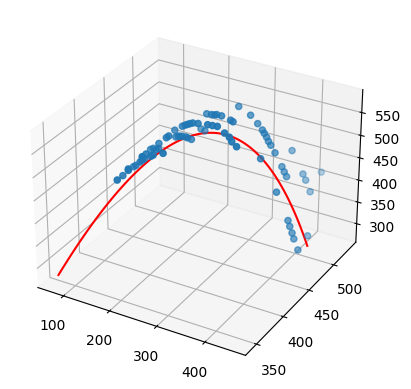

In [26]:
ax2 = plt.axes(projection='3d')
ax2.scatter3D(data['x'], data['z'], data['y']);
plt.plot(palyagorbe1['x'], palyagorbe1['z'], palyagorbe1['y'], c ='r')
plt.show()

In [5]:
#60 fps-en egy frame 16,67 ms
delta_t = 0.01667#sec

In [6]:
#x-re
v_1 = []
a_1 = []
for i in range(2,len(data['x'])):
    v_1.append((data['x'][i+1]/100-data['x'][i-1]/100)/(2*delta_t))
    a_1.append((data['x'][i+1]/100-2*data['x'][i]/100+data['x'][i-1]/100)/(delta_t)**2)
v_1 = np.array(v_1)
a_1 = np.array(a_1)
#print(len(v_1))
#print(a_1)

In [7]:
#y-ra
v_2 = []
a_2 = []
for i in range(2,len(data['y'])):
    v_2.append((data['y'][i+1]/100-data['y'][i-1]/100)/(2*delta_t))
    a_2.append((data['y'][i+1]/100-2*data['y'][i]/100+data['y'][i-1]/100)/(delta_t)**2)
v_2 = np.array(v_2)
a_2 = np.array(a_2)
#print(v_y)
#print(a_y)

In [8]:
#z_szorascsokkentett-re
v_3 = []
a_3 = []
for i in range(1,len(z_szoras)-1):
    v_3.append((z_szoras[i+1]/100-z_szoras[i-1]/100)/(2*delta_t))
    a_3.append((z_szoras[i+1]/100-2*z_szoras[i]/100+z_szoras[i-1]/100)/(delta_t)**2)
v_3 = np.array(v_3)
a_3 = np.array(a_3)
#print(v_z)
#print(a_z)

K = 2

In [9]:
N = len(v_1)
#print(N)
S = np.zeros(6)
M = np.zeros((6,6))

In [10]:
S[0] = np.sum(a_1)
S[1] = np.sum(a_2)
S[2] = np.sum(a_3)

In [11]:
i_s_szumma = []
for i in range(N):
    i_s_szumma.append(v_1[i]*a_1[i] + v_2[i]*a_2[i] + v_3[i]*a_3[i])
i_s_szumma = np.array(i_s_szumma)
#print(i_s_szumma)
S[3] = np.sum(i_s_szumma)

In [12]:
abs_vn = []
for i in range(N):
    abs_vn.append(math.sqrt(v_1[i]**2+v_2[i]**2+v_3[i]**2))
abs_vn = np.array(abs_vn)
s4_hez = np.zeros(N)
for i in range(N):
    s4_hez[i] = abs_vn[i]*i_s_szumma[i]
S[4] = np.sum(s4_hez)
#print(abs_vn)

In [13]:
abs2_vn = abs_vn**2
s5_hoz = np.zeros(N)
for i in range(N):
    s5_hoz[i] = abs2_vn[i]*i_s_szumma[i]
S[5] = np.sum(s5_hoz)
print(S)

[ 2.87884835e+02 -2.15913626e+02 -1.75803728e+03  2.55018988e+04
  1.94039400e+05  1.35467396e+06]


In [18]:
for i in range(6):
    for j in range(6):
        if i <= 2 and j <= 2:
            if i == j:
                M[i,j] = N
            else:
                M[i,j] = 0
        elif i > 2 and j > 2:
            M[i,j] = np.sum(abs_vn**(i+j-4))
        elif i <= 2 and j > 2:
            if i == 0:
                M[i,j] = np.sum(v_1*abs_vn**(j-3))
            elif i == 1:
                M[i,j] = np.sum(v_2*abs_vn**(j-3))
            else:
                M[i,j] = np.sum(v_3*abs_vn**(j-3))
        else:
            if j == 0:
                M[i,j] = np.sum(v_1*abs_vn**(i-3))
            elif j == 1:
                M[i,j] = np.sum(v_2*abs_vn**(i-3))
            else:
                M[i,j] = np.sum(v_3*abs_vn**(i-3))
#print(M)
#print(np.linalg.eig(M))
print(np.linalg.eig(np.linalg.pinv(M)))

(array([1.78385132e-02, 1.47483939e-02, 1.29778295e-02, 1.36993830e-02,
       4.57389650e-05, 3.02714226e-08]), array([[-5.55743534e-01,  3.02209568e-01,  7.04735214e-01,
         3.20953243e-01,  1.24802377e-02, -1.98355962e-04],
       [ 2.46609300e-01, -7.76646236e-01,  3.02526409e-01,
         4.94372745e-01, -8.81722047e-03,  3.06350769e-04],
       [ 6.90598498e-02,  3.54692514e-01, -4.65644568e-01,
         8.07814575e-01,  5.89099960e-03,  5.55101822e-05],
       [-7.72601670e-01, -4.10003250e-01, -4.29518700e-01,
         1.24305283e-04, -2.24588079e-01,  7.60657858e-03],
       [ 1.69054183e-01,  1.07468334e-01,  1.02409521e-01,
         4.46590632e-03, -9.70783088e-01,  8.33293617e-02],
       [-8.42950195e-03, -5.57792556e-03, -5.21187328e-03,
        -5.07496888e-04,  8.28986604e-02,  9.96492961e-01]]))


In [24]:
np.matmul(np.linalg.pinv(M,rcond = 1e-7),S)

array([ 17.85118964, -19.79362561, -16.29333429, -48.35172951,
        15.27744427,  -0.85640334])